In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Life expectancy:
## What variables affect life expectancy? 
## Is life expectancy different in developing and developed countries?

In [478]:
life_expectancy = pd.read_csv('/Users/laurasg/Documents/Ironhack_data/PR04-project-statistical-analysis/Life Expectancy Data.csv')

In [479]:
life_expectancy.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## Columns Explained

**Status:** Developed or Developing status


**Life expectancy:** Life Expectancy in age


**Adult Mortality:** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)


**infant deaths:** Number of Infant Deaths per 1000 population


**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)


**percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%)


**BMI:** Average Body Mass Index of entire population


**Total expenditure:** General government expenditure on health as a percentage of total government expenditure (%)


**GDP:** Gross Domestic Product per capita (in USD)


**Income composition of resources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)


**Schooling:** Number of years of Schooling(years)

In [480]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [481]:
life_expectancy.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Using interpolate to fill the null values, and removing the ones that were not filled

In [482]:

country_list = life_expectancy.Country.unique()
fill_list = ['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']

In [483]:
for country in country_list:
    
    life_expectancy.loc[life_expectancy['Country'] == country,fill_list] = life_expectancy.loc[life_expectancy['Country'] == country,fill_list].interpolate(limit_direction='both')
    
    
     

In [484]:
life_expectancy.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [485]:
life_expectancy.dropna(inplace=True)

## Verifying we don't have any more null values

In [486]:
life_expectancy.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Exploring our dataset

In [460]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,68.139709,174.300282,35.902726,4.348240,640.072009,74.270207,2657.467105,36.691964,49.817199,80.335996,5.899370,80.477444,2.173637,5402.417263,1.339761e+07,5.107895,5.177538,0.607481,11.691823
std,4.610856,9.610700,129.759274,136.224732,3.998403,1710.798798,28.796545,11912.236064,19.843731,185.152708,24.494233,2.305911,24.478990,5.827273,11376.222749,6.315772e+07,4.711951,4.805378,0.203404,3.203263
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,62.000000,76.000000,1.000000,0.590000,19.883256,64.000000,0.000000,18.400000,1.000000,74.000000,4.357500,76.000000,0.100000,393.276186,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,69.950000,152.000000,4.000000,3.600000,83.677991,87.000000,20.000000,38.850000,4.000000,91.000000,5.790000,91.000000,0.100000,1353.159574,1.425337e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,74.800000,241.250000,24.000000,7.115000,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.390000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000


## Checking the correlation between variables

In [461]:
life_expectancy.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.177657,-0.074374,-0.041393,-0.081098,0.038502,0.240799,-0.097629,0.105160,-0.046959,0.101916,0.065920,0.150779,-0.155673,0.108439,0.016334,-0.050736,-0.055568,0.247605,0.225527
Life expectancy,0.177657,1.000000,-0.662604,-0.162808,0.389721,0.395555,0.257455,-0.135319,0.594391,-0.189417,0.415962,0.207059,0.439997,-0.572137,0.445207,-0.011400,-0.458721,-0.450215,0.734244,0.746619
Adult Mortality,-0.074374,-0.662604,1.000000,0.042165,-0.180570,-0.233876,-0.105082,-0.005653,-0.370251,0.056828,-0.208311,-0.101518,-0.207256,0.532695,-0.259204,-0.021083,0.277278,0.282890,-0.418546,-0.408661
infant deaths,-0.041393,-0.162808,0.042165,1.000000,-0.100375,-0.085955,-0.211601,0.520328,-0.225732,0.996602,-0.148132,-0.145975,-0.152183,0.003869,-0.097811,0.555955,0.483646,0.489440,-0.139262,-0.194936
Alcohol,-0.081098,0.389721,-0.180570,-0.100375,1.000000,0.422046,0.105253,-0.025836,0.375058,-0.096070,0.241416,0.233154,0.245435,-0.029060,0.454528,-0.024183,-0.394120,-0.382793,0.523413,0.578950
percentage expenditure,0.038502,0.395555,-0.233876,-0.085955,0.422046,1.000000,-0.016486,-0.065444,0.260670,-0.088478,0.156055,0.207614,0.161859,-0.102166,0.934251,-0.015303,-0.258344,-0.258194,0.390096,0.405435
Hepatitis B,0.240799,0.257455,-0.105082,-0.211601,0.105253,-0.016486,1.000000,-0.135476,0.193543,-0.221734,0.453970,0.130265,0.567665,-0.108893,0.013498,-0.090959,-0.160053,-0.175883,0.242507,0.270036
Measles,-0.097629,-0.135319,-0.005653,0.520328,-0.025836,-0.065444,-0.135476,1.000000,-0.165920,0.527674,-0.107199,-0.108857,-0.112046,0.020215,-0.073273,0.266177,0.234345,0.229632,-0.135472,-0.142565
BMI,0.105160,0.594391,-0.370251,-0.225732,0.375058,0.260670,0.193543,-0.165920,1.000000,-0.235991,0.250426,0.231704,0.252015,-0.236691,0.304125,-0.067928,-0.555157,-0.562781,0.542882,0.585756
under-five deaths,-0.046959,-0.189417,0.056828,0.996602,-0.096070,-0.088478,-0.221734,0.527674,-0.235991,1.000000,-0.165730,-0.146375,-0.172803,0.015733,-0.101457,0.543573,0.485134,0.489724,-0.159229,-0.211838


<AxesSubplot:>

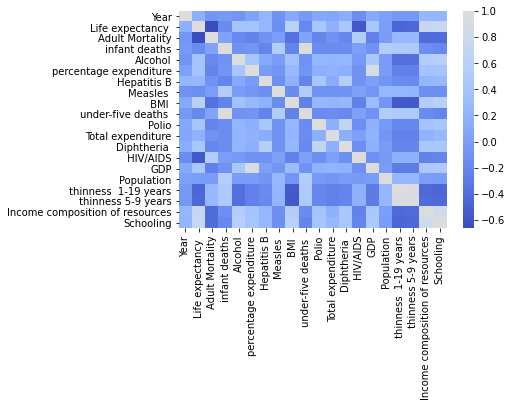

In [462]:
sns.heatmap(life_expectancy.corr(),cmap='coolwarm', annot=False, center=True)

We can see that the most correlated variables with our outcome or dependent variable, Life expectancy, are 'Adult Mortality' (negatively correlated),' BMI ', 'Income composition of resources' and 'Schooling'

In [463]:
new_df = life_expectancy[['Life expectancy ', 'Adult Mortality',' BMI ', 'Income composition of resources', 'Schooling']]

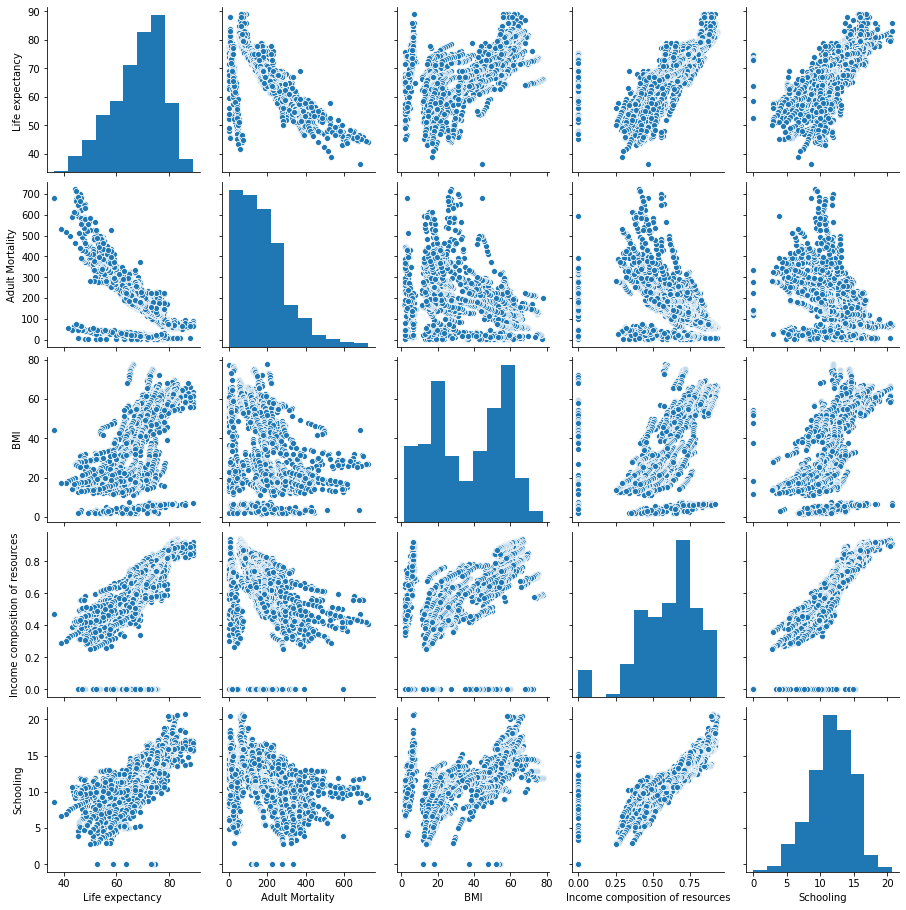

In [464]:
sns.pairplot(new_df)

## Analysis of the mean of Developed Countries and Developing Countries' populations. 

We use one-hot enconding to t-test both groups

In [465]:
df = pd.get_dummies(life_expectancy, columns=['Status'])
df.sample(5)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
993,Georgia,2000,71.8,129.0,2,3.28,47.817042,55.0,50,46.0,...,8.0,0.1,691.997711,44183.0,3.1,3.1,0.000,11.4,0,1
1901,Nigeria,2007,55.0,388.0,542,9.55,104.474644,42.0,2613,2.4,...,42.0,5.2,1136.829645,14641724.0,12.3,12.3,0.477,9.1,0,1
425,Burundi,2006,54.1,361.0,24,4.50,21.249153,92.0,784,14.5,...,92.0,3.8,165.879418,7675338.0,8.1,8.2,0.290,5.9,0,1
1907,Nigeria,2001,47.4,48.0,574,9.58,15.830985,18.0,168107,17.3,...,27.0,5.1,351.799667,125463434.0,14.1,14.1,0.000,8.0,0,1
146,Azerbaijan,2013,72.2,121.0,5,2.14,275.651493,93.0,164,5.6,...,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9,0,1


1. Developed Countries group

In [466]:

developed_countries = df[df['Status_Developed']==1]['Life expectancy ']
developed_countries

112     82.8
113     82.7
114     82.5
115     82.3
116     82.0
        ... 
2516    83.0
2517    82.0
2518    79.9
2519    79.8
2520    79.6
Name: Life expectancy , Length: 304, dtype: float64

2. Developing Countries group

In [467]:
developing_countries = df[df['Status_Developed']==0]['Life expectancy ']
developing_countries.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

Let's plot both's groups' life expectancy

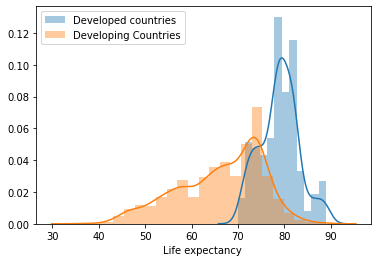

In [468]:
sns.distplot(developed_countries)
sns.distplot(developing_countries)
plt.legend(['Developed countries', 'Developing Countries'])

Analysing both distributions: skewness, kurtosis

In [469]:
developing_countries.skew()

-0.5487511344020783

The developing countries' distribution is negatively of left skewed

In [470]:
developed_countries.skew()

0.1355973922935238

The developed countries' distribution is positively of right skewed

In [471]:
developing_countries.kurtosis()

-0.4011105411487743

In [472]:
developed_countries.kurtosis()

-0.13201279731034443

Both distributions have a negative kurtosis, which means that most of the data are around the mean. 

In [473]:
sample = stats.norm(10,1).rvs(10000)

In [474]:
stats.skew(sample)

-0.02360260262886426

In [475]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

Boxplot of both groups

<AxesSubplot:>

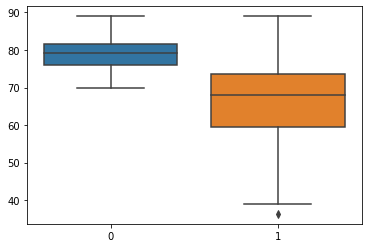

In [476]:
sns.boxplot(data=[developed_countries, developing_countries])

In these boxplots we can see that the range of the life expectancy is bigger in developing countries, where it also has some outliers. The mean in developing countries is around 80, whereas in developing countris is shorter, less than 70 years. 

## T-test

Our null hypothesis is that the means of the populations of both groups - Developed Countries and Developing Countries are equal

In [421]:
alpha = 0.05

In [422]:
r = sp.stats.ttest_ind(developed_countries, developing_countries)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=23.720859135898525, pvalue=1.502407862645548e-110)
True


Since the pvalue is < than our alpha, with a 95% confidence interval, we reject the null hypothesis: the means of the populations of both groups are not equal.

## Regression analysis

We'll transform the Countries variable into a dummy variable,for our regression analysis

In [424]:
new_df = pd.get_dummies(df, columns=['Country'])

In [425]:
new_df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


In [426]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Columns: 155 entries, Year to Country_Zimbabwe
dtypes: float64(16), int64(4), uint8(135)
memory usage: 709.7 KB


We define both variables of our regression, we will use all the variables for our model

In [427]:
X= new_df.drop('Life expectancy ',axis=1)

In [428]:
y = new_df['Life expectancy ']

In [430]:
lr = LinearRegression()

**Train Test Split**

In [431]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [432]:
lr.fit(X_train, y_train)

LinearRegression()

**Evaluate**

In [433]:
lr.score(X,y)

0.9625055079236811

In [487]:
y_pred = lr.predict(X)
y_pred

array([59.84336538, 59.92171992, 59.69670328, ..., 44.64342627,
       42.24574406, 42.0173855 ])

In [436]:
r2_score(y, y_pred)

0.9625055079236811

Our R2 is 0.96, which means that our model explains 96% of the variability of Y (life expectancy), which is a pretty good value. 

In [437]:
mean_squared_error(y, y_pred)

3.4615717590212673

Our mean square error is pretty low, which is also good. 

What if we try a model with less variables?

In [ ]:
lr = LinearRegression()

In [358]:
X = df[['Adult Mortality', ' BMI ', 'Income composition of resources', 'Schooling']]

In [359]:
y = df['Life expectancy ']

In [360]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [361]:
lr.fit(X_train, y_train)

LinearRegression()

In [364]:
lr.score(X,y)

0.7474466753588852

We can see that the score is lower than in the previous model

In [376]:
y_pred = lr.predict(X)

array([61.30590689, 60.91905979, 60.80545202, 60.48201336, 59.99032251])

In [368]:
r2_score(y, y_pred)

0.7474466753588852

The model explais now 74% of the variability in our outcome variable, life expectancy. 

In [377]:
mean_squared_error(y, y_pred)

23.31626347798335

And our mean square error is also higher